In [1]:
library(tidyverse)

library(grid)
library(gridExtra)

source("/home/yuliya/repos/other/removeBatch/evaluation_utils/plots_eda.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“package ‘ggsci’ was built under R version 4.3.3”
Loading required package: viridisLite



In [2]:
cbPalette <- c("#861657", "#2A9D8F", "#E76F51", "#E2AFDE", "#0D310C")

# Load data

In [3]:
central_uncorrected <- list()
central_corrected <- list()
metadata <- list()

data_path <- "/home/yuliya/repos/other/removeBatch/evaluation_data/proteomics/"

for (mode in c("balanced", "imbalanced")){
    central_corrected[[mode]] <- read.csv(paste0(data_path, "after/", mode, "/central_intensities_log_filtered_corrected.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)
    central_uncorrected[[mode]] <- read.csv(paste0(data_path, "before/", mode, "/central_intensities_log_filtered.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)
    metadata[[mode]] <- read.csv(paste0(data_path, "before/", mode, "/central_batch_info.tsv"), sep = "\t", header = TRUE, row.names = 1)

    # remove X from row names
    # rownames(metadata[[mode]]) <- gsub("X", "", rownames(metadata[[mode]]))
    metadata[[mode]]$file <- rownames(metadata[[mode]])
    # order the columns in intensity dataframes
    central_corrected[[mode]] <- central_corrected[[mode]][, rownames(metadata[[mode]])]
    central_uncorrected[[mode]] <- central_uncorrected[[mode]][, rownames(metadata[[mode]])]

    cat("Loaded data for", mode, "\n")
    cat("Central corrected:", nrow(central_corrected[[mode]]), "rows\n")
    cat("Central uncorrected:", nrow(central_uncorrected[[mode]]), "rows\n")
    cat("Sample metadata:", nrow(metadata[[mode]]), "rows\n\n")

}


Loaded data for balanced 
Central corrected: 2273 rows
Central uncorrected: 2273 rows
Sample metadata: 118 rows

Loaded data for imbalanced 
Central corrected: 2272 rows
Central uncorrected: 2272 rows
Sample metadata: 73 rows



# Checks

## Diagnostic plots

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


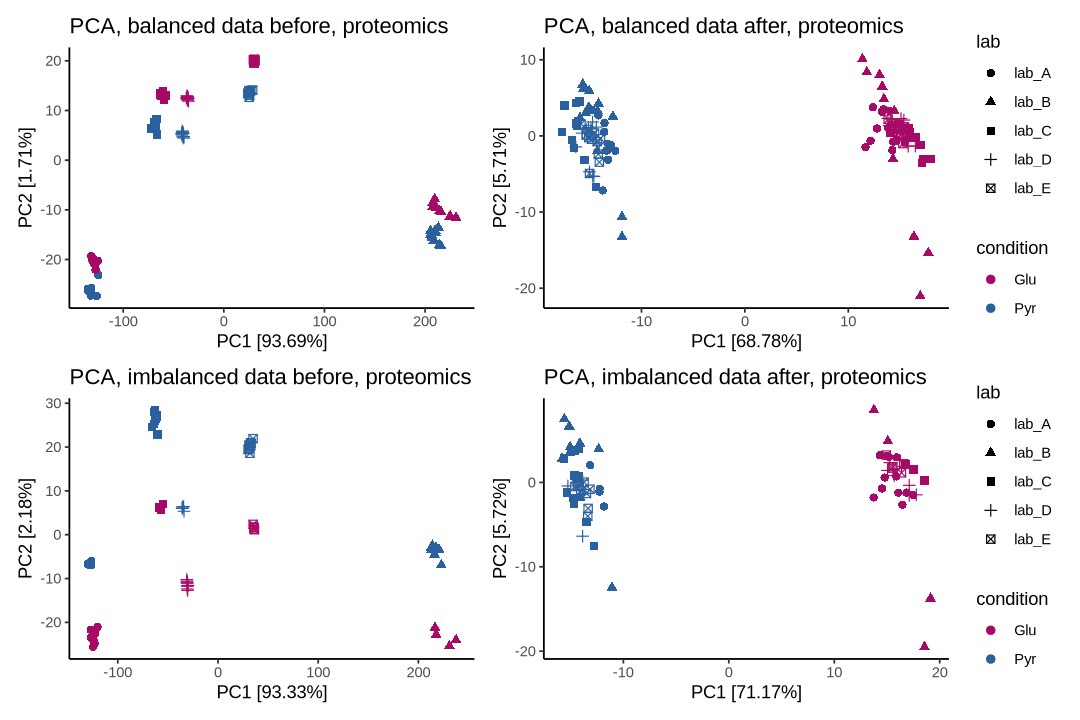

In [4]:
pca_plot_uncorrected <- list()
pca_plot_corrected <- list()

for(mode in c("balanced", "imbalanced")){
    pca_plot_uncorrected[[mode]] <- pca_plot(central_uncorrected[[mode]], metadata[[mode]], 
        title = paste("PCA,", mode, "data before, proteomics"),
        quantitative_col_name = "file", col_col = "condition", shape_col="lab", show_legend=F, cbPalette=c("#a70a66", "#2a609d"))
    pca_plot_corrected[[mode]] <- pca_plot(central_corrected[[mode]], metadata[[mode]], 
        title = paste("PCA,", mode, "data after, proteomics"),
        quantitative_col_name = "file", col_col = "condition", shape_col="lab", show_legend=T, cbPalette=c("#a70a66", "#2a609d"))
}

layout <- (pca_plot_uncorrected[['balanced']] + pca_plot_corrected[['balanced']]) /
            (pca_plot_uncorrected[['imbalanced']] + pca_plot_corrected[['imbalanced']])  

options(repr.plot.width=9, repr.plot.height=6)
layout

In [5]:
# boxplots_uncorrected <- list()
# boxplots_corrected <- list()

# for(mode in c("balanced", "imbalanced")){
#     boxplots_uncorrected[[mode]] <- boxplot_plot(central_uncorrected[[mode]], metadata[[mode]], 
#         title = paste("Boxplots,", mode, "data before, proteomics"),
#         quantitativeColumnName = "file",
#         color_col = "lab", remove_xnames = T)
#     boxplots_corrected[[mode]] <- boxplot_plot(central_corrected[[mode]], metadata[[mode]], 
#         title = paste("Boxplots,", mode, "data after, proteomics"),
#         quantitativeColumnName = "file",
#         color_col = "lab", remove_xnames = T)
# }

# layout <- (boxplots_uncorrected[['balanced']] + boxplots_corrected[['balanced']]) /
#             (boxplots_uncorrected[['imbalanced']] + boxplots_corrected[['imbalanced']])

# options(repr.plot.width=16, repr.plot.height=6)
# layout

Warning message:
“Removed 1778 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_violin()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 43 rows containing missing values (`geom_violin()`).”
Warning message:
“Removed 1011 rows containing non-finite value

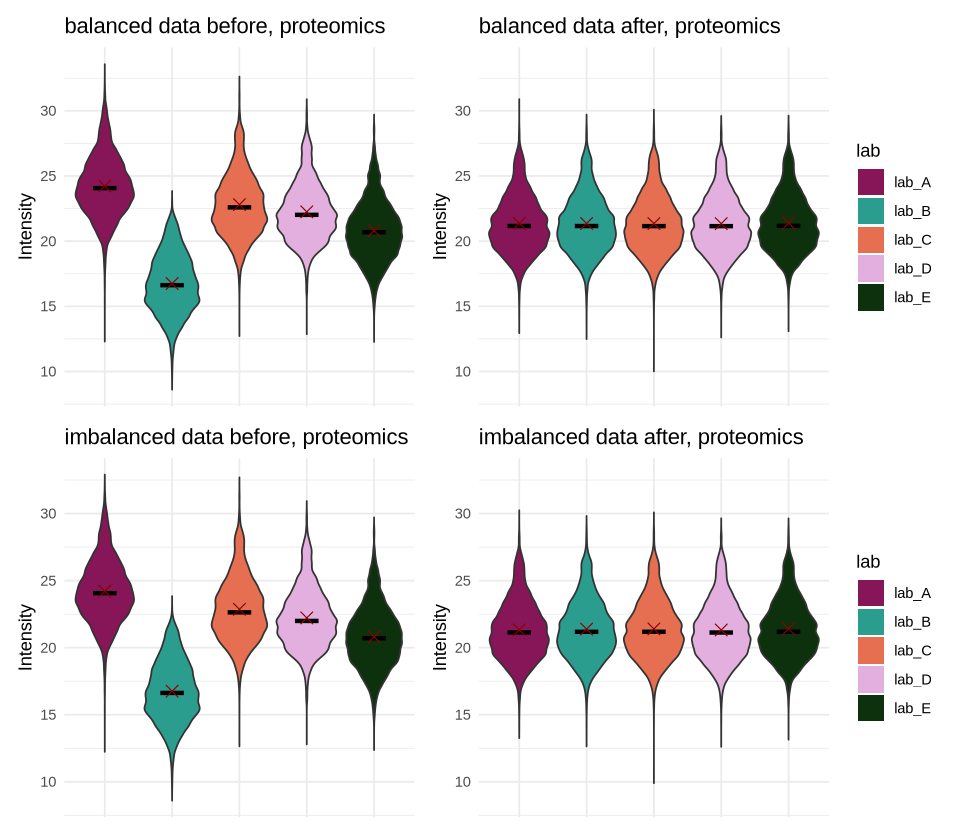

In [6]:
boxplots_uncorrected <- list()
boxplots_corrected <- list()




for(mode in c("balanced", "imbalanced")){
    # # Determine the shared Y-axis limits
    y_min <- min(central_uncorrected[[mode]], central_corrected[[mode]], na.rm = TRUE)
    y_max <- max(central_uncorrected[[mode]], central_corrected[[mode]], na.rm = TRUE)
    y_limits <- c(y_min, y_max)

    boxplots_uncorrected[[mode]] <- boxplot_plot_groupped(central_uncorrected[[mode]], metadata[[mode]], 
        title = paste(mode, "data before, proteomics"),
        quantitativeColumnName = "file",
        color_col = "lab", remove_xnames = T, show_legend=F, y_limits = y_limits, cbPalette = cbPalette)
    boxplots_corrected[[mode]] <- boxplot_plot_groupped(central_corrected[[mode]], metadata[[mode]], 
        title = paste(mode, "data after, proteomics"),
        quantitativeColumnName = "file",
        color_col = "lab", remove_xnames = T, y_limits = y_limits, cbPalette = cbPalette)
}

layout <- (boxplots_uncorrected[['balanced']] + boxplots_corrected[['balanced']]) /
            (boxplots_uncorrected[['imbalanced']] + boxplots_corrected[['imbalanced']])

options(repr.plot.width=8, repr.plot.height=7)
layout

Warning message:
“Removed 1778 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_violin()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 43 rows containing missing values (`geom_violin()`).”
Warning message:
“Removed 1011 rows containing non-finite value

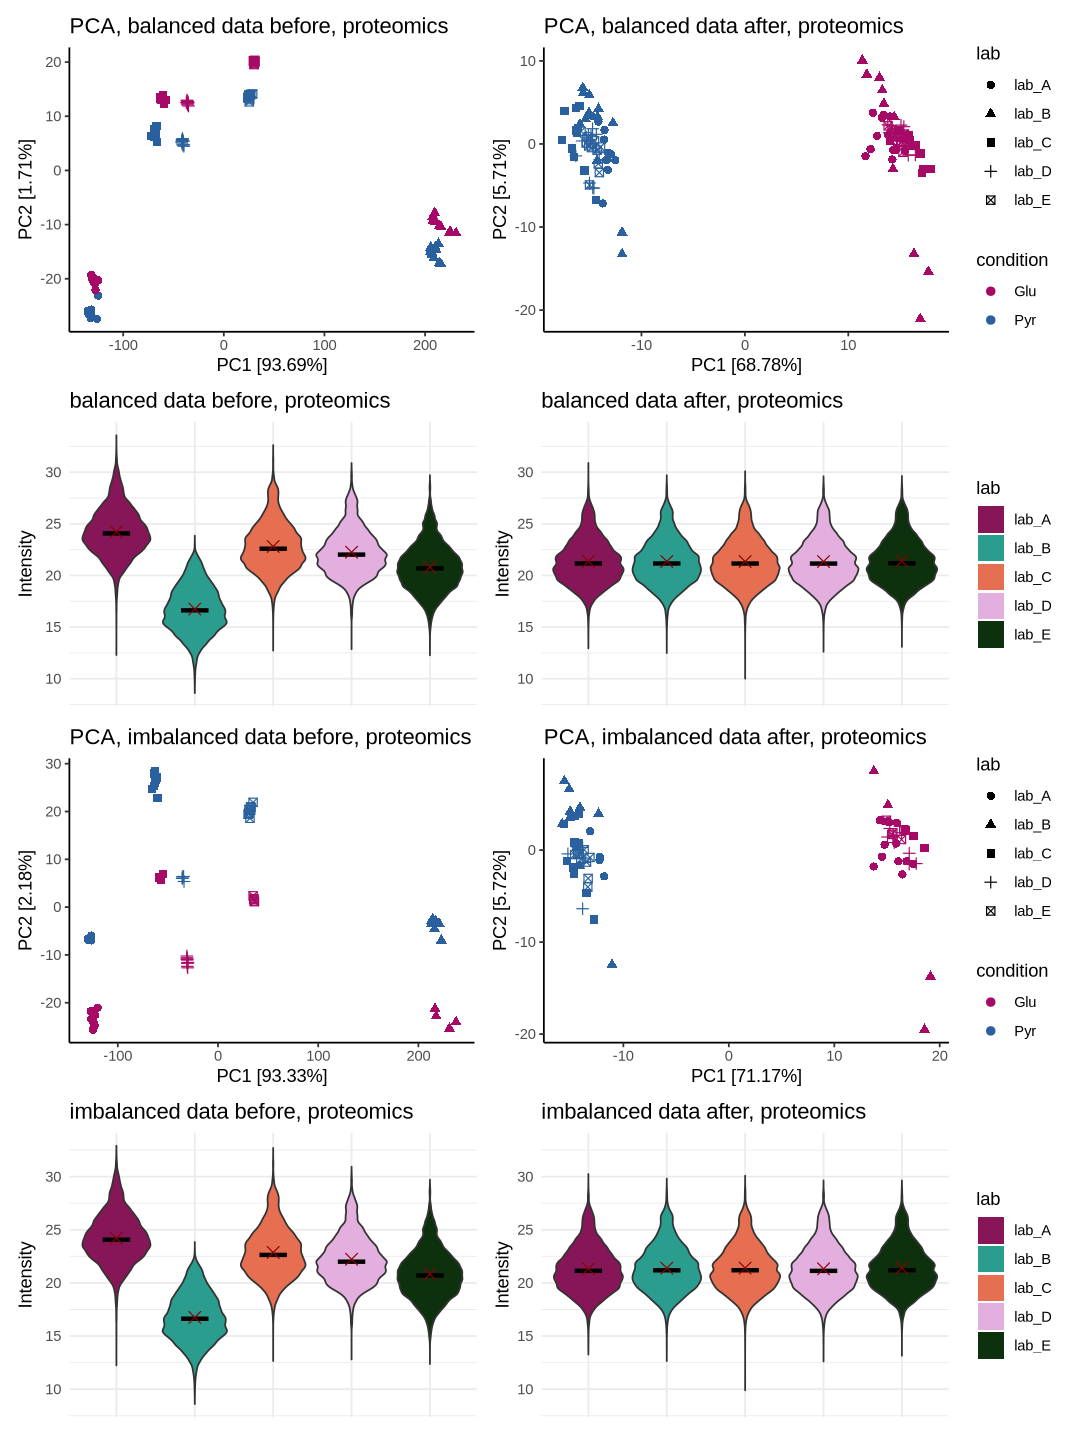

In [7]:
layout <- (pca_plot_uncorrected[['balanced']] + pca_plot_corrected[['balanced']]) /
            (boxplots_uncorrected[['balanced']] + boxplots_corrected[['balanced']]) /
            (pca_plot_uncorrected[['imbalanced']] + pca_plot_corrected[['imbalanced']]) /
            (boxplots_uncorrected[['imbalanced']] + boxplots_corrected[['imbalanced']])

options(repr.plot.width=9, repr.plot.height=12)
layout

In [8]:
# density_plots_uncorrected <- list()
# density_plots_corrected <- list()

# for(mode in c("balanced", "imbalanced")){
#     density_plots_uncorrected[[mode]] <- plotIntensityDensity(central_uncorrected[[mode]], metadata[[mode]], 
#         title = paste("Density,", mode, "before, proteomics"),
#         quantitativeColumnName = "file",
#         colorColumnName = "lab")
#     density_plots_corrected[[mode]] <- plotIntensityDensity(central_corrected[[mode]], metadata[[mode]], 
#         title = paste("Density,", mode, "after, proteomics"),
#         quantitativeColumnName = "file",
#         colorColumnName = "lab")
# }

# layout <- (density_plots_uncorrected[['balanced']] + density_plots_corrected[['balanced']]) /
#             (density_plots_uncorrected[['imbalanced']] + density_plots_corrected[['imbalanced']])

# options(repr.plot.width=12, repr.plot.height=5)
# layout


##  Linear model per variable

Following batch effect correction, the percentage of variance explained by the condition should be greater than the batch.

In [9]:
library(variancePartition)

Loading required package: limma



Loading required package: BiocParallel


Attaching package: ‘variancePartition’


The following object is masked from ‘package:limma’:

    topTable




In [10]:
lmpv_plot <- function(data, metadata, title, show_legend = T){
    form <- ~ condition + lab

    varPart <- fitExtractVarPartModel(na.omit(data), form, metadata)
    variance_col <- as.matrix(varPart[,1:2])

    df_long <- reshape2::melt(variance_col)

    # Plotting the boxplots using ggplot2
    res_plots <- ggplot(df_long, aes(x = Var2, y = value, fill=Var2)) +
      geom_boxplot() +
      labs(title = title,
           y = "Proportion Variance", x = "Column") +
          scale_fill_discrete(name = "Column") +
      theme_minimal()

  if(!show_legend){
    res_plots <- res_plots + 
    theme(legend.position = "none")
  }

  return(res_plots)
}

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Total:7 s


Total:7 s


Total:7 s


Total:7 s



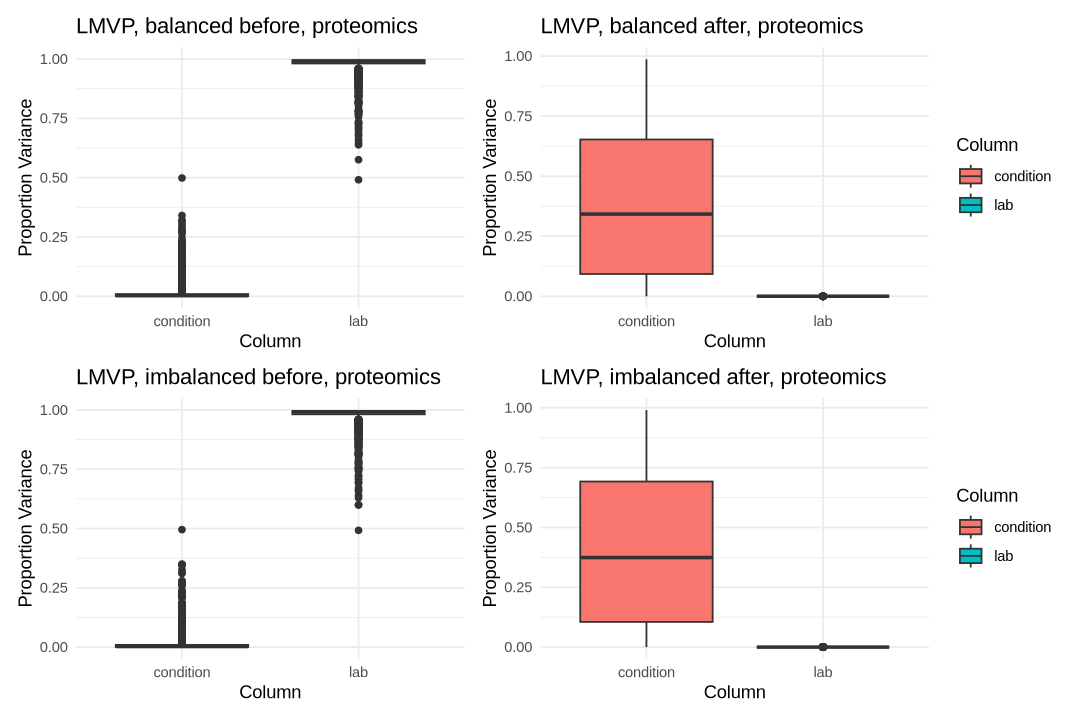

In [11]:
lmpv_plots_corrected <- list()
lmpv_plot_uncorrected <- list()

for(mode in c("balanced", "imbalanced")){
    lmpv_plots_corrected[[mode]] <- lmpv_plot(central_corrected[[mode]], metadata[[mode]], 
        title = paste("LMVP,", mode, "after, proteomics"))
    lmpv_plot_uncorrected[[mode]] <- lmpv_plot(central_uncorrected[[mode]], metadata[[mode]], 
        title = paste("LMVP,", mode, "before, proteomics"), show_legend=F)
}

layout <- (lmpv_plot_uncorrected[['balanced']] + lmpv_plots_corrected[['balanced']]) /
            (lmpv_plot_uncorrected[['imbalanced']] + lmpv_plots_corrected[['imbalanced']])

options(repr.plot.width=9, repr.plot.height=6)
layout

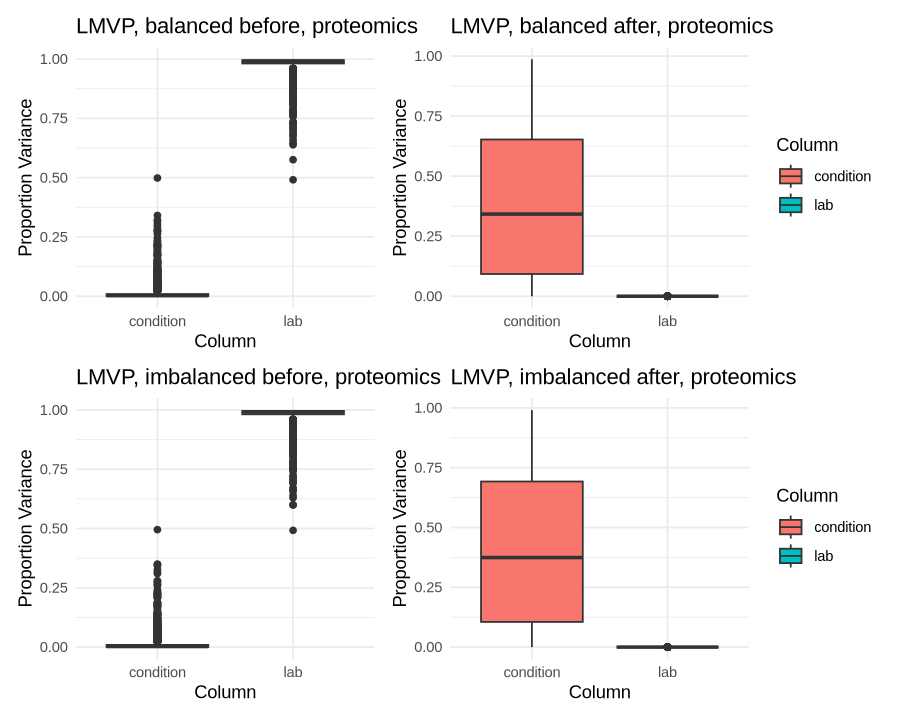

In [13]:
options(repr.plot.width=7.5, repr.plot.height=6)
layout